In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

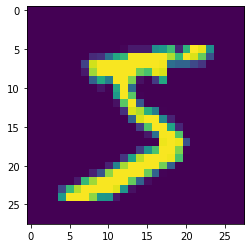

In [3]:
plt.imshow(X_train[0])

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9 ,10])
print(a)
b = a[a%2 == 0]
print('b is: ', b)

[ 1  2  3  4  5  6  7  8  9 10]
b is:  [ 2  4  6  8 10]


In [6]:
only_zeros = X_train[y_train == 0]

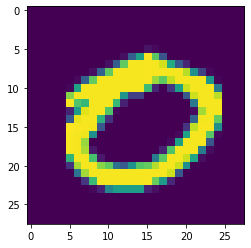

In [7]:
plt.imshow(only_zeros[14])

In [60]:
discriminator = Sequential()
discriminator = Sequential(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(300, 'relu'))
discriminator.add(Dense(150, 'relu'))
discriminator.add(Dense(75, 'relu'))
discriminator.add(Dense(1, 'sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# 100 -> 150 -> 784
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[1]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(300, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28, 28]))

In [62]:
GAN = Sequential([discriminator, generator])

In [63]:
discriminator.trainable = False

In [64]:
GAN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
GAN.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_19 (Sequential)   (None, 1)                 292051    
_________________________________________________________________
sequential_20 (Sequential)   (None, 28, 28)            296634    
Total params: 588,685
Trainable params: 296,634
Non-trainable params: 292,051
_________________________________________________________________


In [66]:
batch_size = 32

In [77]:
mydata = only_zeros

In [78]:
dataset = tf.data.Dataset.from_tensor_slices(mydata).shuffle(buffer_size=1000)

In [79]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [80]:
dataset = dataset.batch(batch_size, drop_remainder=True)

In [81]:
GAN.fit(dataset, epochs=10)

Epoch 1/10


ValueError: in user code:

    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:540 train_step  **
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1803 _minimize
        gradients = optimizer._aggregate_gradients(zip(gradients,  # pylint: disable=protected-access
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:521 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    /home/siki/.virtualenvs/datascience_env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:1218 _filter_grads
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['dense_40/kernel:0', 'dense_40/bias:0', 'dense_41/kernel:0', 'dense_41/bias:0', 'dense_42/kernel:0', 'dense_42/bias:0', 'dense_43/kernel:0', 'dense_43/bias:0'].
